In [47]:
import numpy as np
import matplotlib.pylab as plt
import pyexcel_ods as exc

col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey', 'navy', 'crimson', 'blue', 'red', 'green', 'orange', 'purple', 'dimgrey', 'navy', 'crimson']
n=2
fs = 'xx-large'

In [48]:
filename='/home/matti/programming/figures_py/benchmark_trees.ods'
data = exc.get_data(filename)
rows = 6
cols = 8

def func_read_to_numpy(data, idx, rows, cols):
    arr = np.zeros((rows,cols),dtype=float)
    if (idx==0) : extra=2
    else : extra=2+3*idx
    off = idx * rows + extra;
    for j in range(rows):
        arr[j,:] = np.asarray(data[j+off])
    return arr;

ann     = func_read_to_numpy(data['Sheet1'],0,rows,cols)
flann   = func_read_to_numpy(data['Sheet1'],1,rows,cols)
faiss   = func_read_to_numpy(data['Sheet1'],2,rows,cols)
hnswlib = func_read_to_numpy(data['Sheet1'],3,rows,cols)
ggnn    = func_read_to_numpy(data['Sheet1'],4,rows,cols)

lab = []
for i in range(rows):
    lab.append('%d'%int(np.log2(ann[i,0])))
lab

['11', '13', '14', '15', '16', '17']

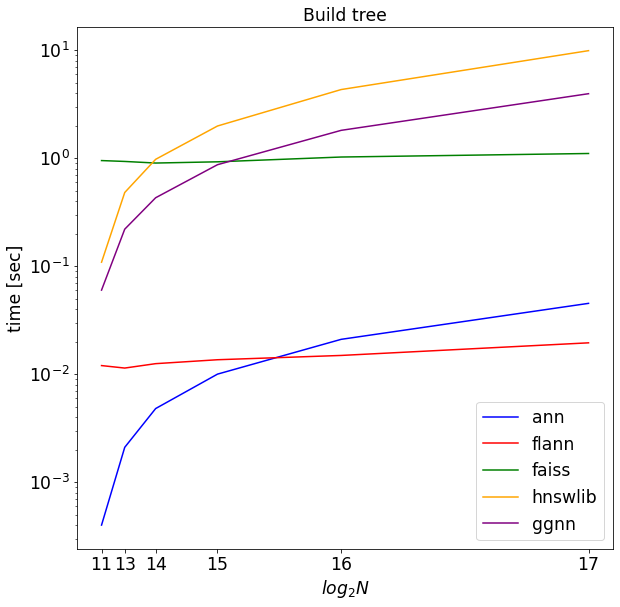

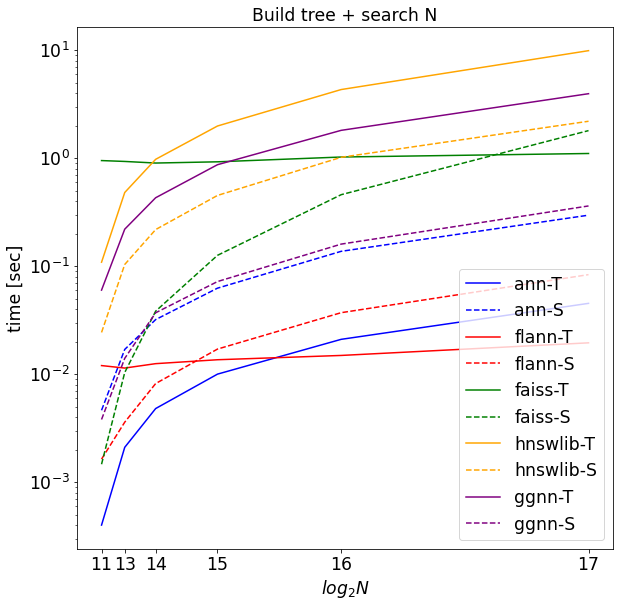

In [49]:
plot = plt.semilogy
_ = plt.figure(0,figsize=[n*4.8,n*4.8])
_ = plot(ann[:,0],     ann[:,1],     color=col[0], label='ann')
_ = plot(flann[:,0],   flann[:,1],   color=col[1], label='flann')
_ = plot(faiss[:,0],   faiss[:,1],   color=col[2], label='faiss')
_ = plot(hnswlib[:,0], hnswlib[:,1], color=col[3], label='hnswlib')
_ = plot(ggnn[:,0],    ggnn[:,1],    color=col[4], label='ggnn')
_ = plt.xlabel(r'$log_2 N$', fontsize=fs)
_ = plt.ylabel('time [sec]', fontsize=fs)
_ = plt.xticks(ticks=ann[:,0],labels=lab,fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.legend(fontsize=fs)
_ = plt.title('Build tree',fontsize=fs)

ls = "--"
_ = plt.figure(1,figsize=[n*4.8,n*4.8])
_ = plot(ann[:,0],     ann[:,1],     color=col[0], label='ann-T')
_ = plot(ann[:,0],     ann[:,2],     color=col[0], linestyle=ls, label='ann-S')
_ = plot(flann[:,0],   flann[:,1],   color=col[1], label='flann-T')
_ = plot(flann[:,0],   flann[:,2],   color=col[1], linestyle=ls, label='flann-S')
_ = plot(faiss[:,0],   faiss[:,1],   color=col[2], label='faiss-T')
_ = plot(faiss[:,0],   faiss[:,2],   color=col[2], linestyle=ls, label='faiss-S')
_ = plot(hnswlib[:,0], hnswlib[:,1], color=col[3], label='hnswlib-T')
_ = plot(hnswlib[:,0], hnswlib[:,2], color=col[3], linestyle=ls, label='hnswlib-S')
_ = plot(ggnn[:,0],    ggnn[:,1],    color=col[4], label='ggnn-T')
_ = plot(ggnn[:,0],    ggnn[:,2],    color=col[4], linestyle=ls, label='ggnn-S')
_ = plt.xlabel(r'$log_2 N$', fontsize=fs)
_ = plt.ylabel('time [sec]', fontsize=fs)
_ = plt.xticks(ticks=ann[:,0],labels=lab,fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.legend(fontsize=fs)
_ = plt.title('Build tree + search N',fontsize=fs)

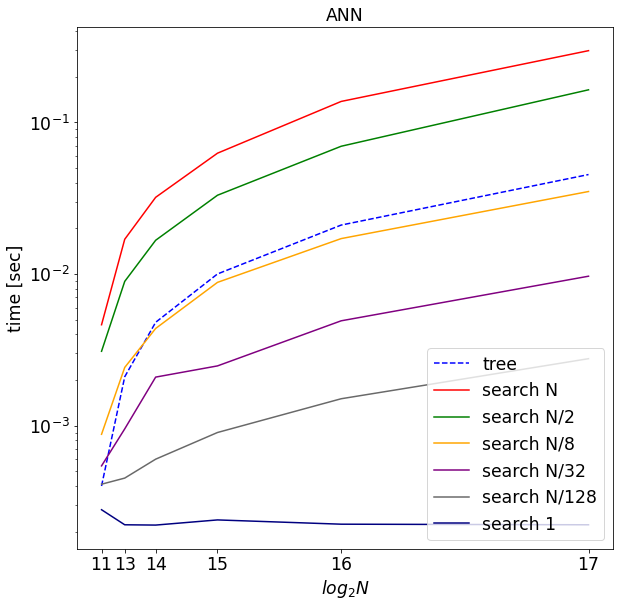

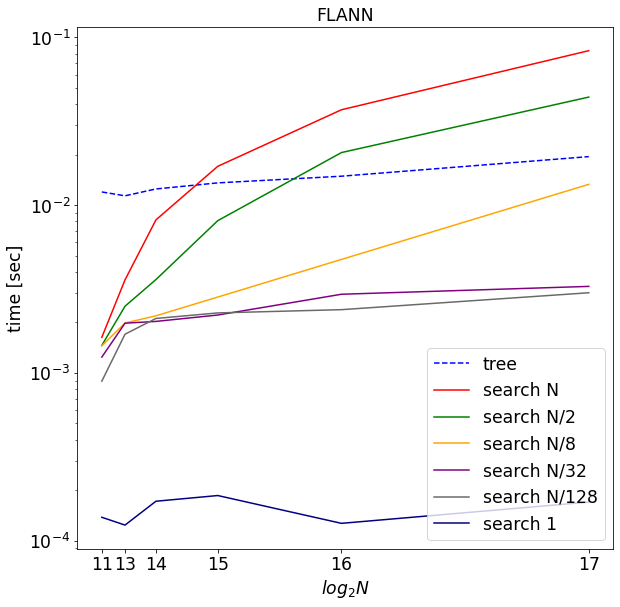

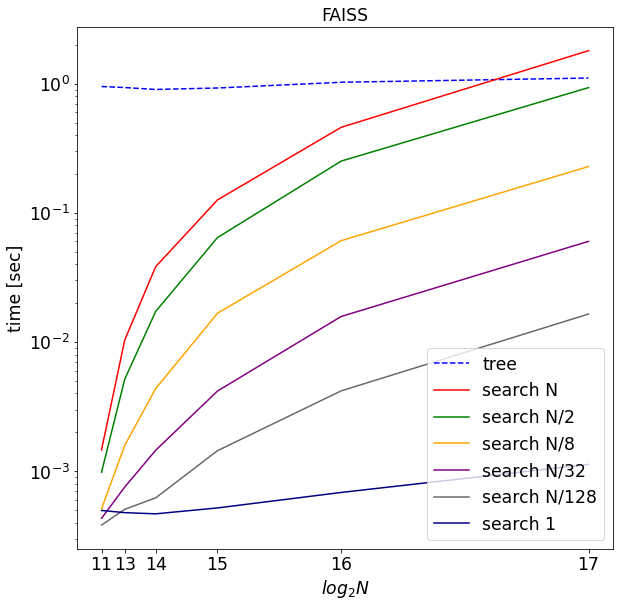

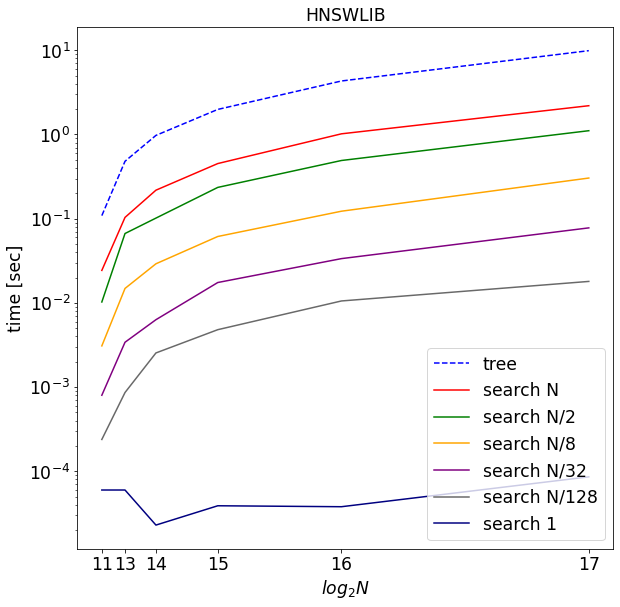

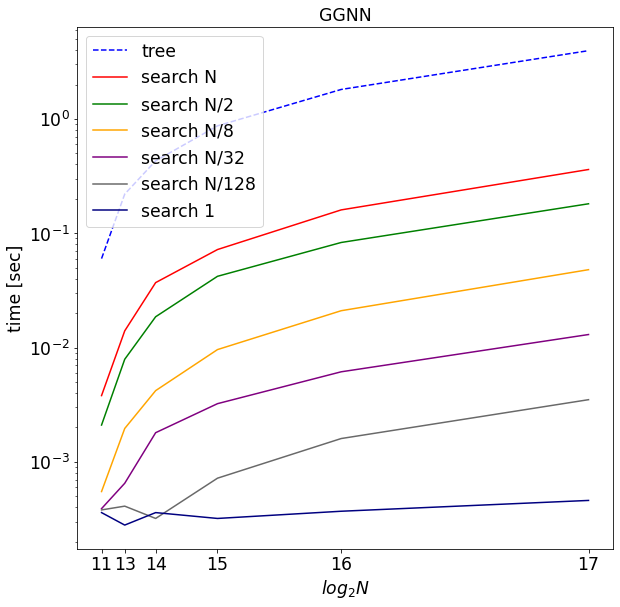

In [50]:
def plot_a_code(arr, title, ls, n, col, lab, fs, idx, plot=plt.semilogy):
    _ = plt.figure(idx,figsize=[n*4.8,n*4.8])
    _ = plot(arr[:,0], arr[:,1], color=col[0], linestyle=ls, label='tree')
    _ = plot(arr[:,0], arr[:,2], color=col[1], label='search N')
    _ = plot(arr[:,0], arr[:,3], color=col[2], label='search N/2')
    _ = plot(arr[:,0], arr[:,4], color=col[3], label='search N/8')
    _ = plot(arr[:,0], arr[:,5], color=col[4], label='search N/32')
    _ = plot(arr[:,0], arr[:,6], color=col[5], label='search N/128')
    _ = plot(arr[:,0], arr[:,7], color=col[6], label='search 1')
    _ = plt.xlabel(r'$log_2 N$', fontsize=fs)
    _ = plt.ylabel('time [sec]', fontsize=fs)
    _ = plt.xticks(ticks=ann[:,0],labels=lab,fontsize=fs)
    _ = plt.yticks(fontsize=fs)
    _ = plt.legend(fontsize=fs)
    _ = plt.title(title,fontsize=fs)
    
plot_a_code(ann, 'ANN', ls, n, col, lab, fs, 0)
plot_a_code(flann, 'FLANN', ls, n, col, lab, fs, 1)
plot_a_code(faiss, 'FAISS', ls, n, col, lab, fs, 2)
plot_a_code(hnswlib, 'HNSWLIB', ls, n, col, lab, fs, 3)
plot_a_code(ggnn, 'GGNN', ls, n, col, lab, fs, 4)